## <font color="red">OBJECTIVE: <font color/>
- The banks face the risk of loan default, which is called __`credit risk`__. 
- To predict loan defaulters and reduce non-performing assets, banks need to manage credit risk effectively. 
- Machine learning technology can be used to predict loan default by learning from previous data.

## <font color="red">PROBLEM STATEMENT: <font color/>
- How can banks effectively predict loan defaulters and reduce non-performing assets using machine learning technology?

## <font color="red">DATA DESCRIPTION: <font color/>
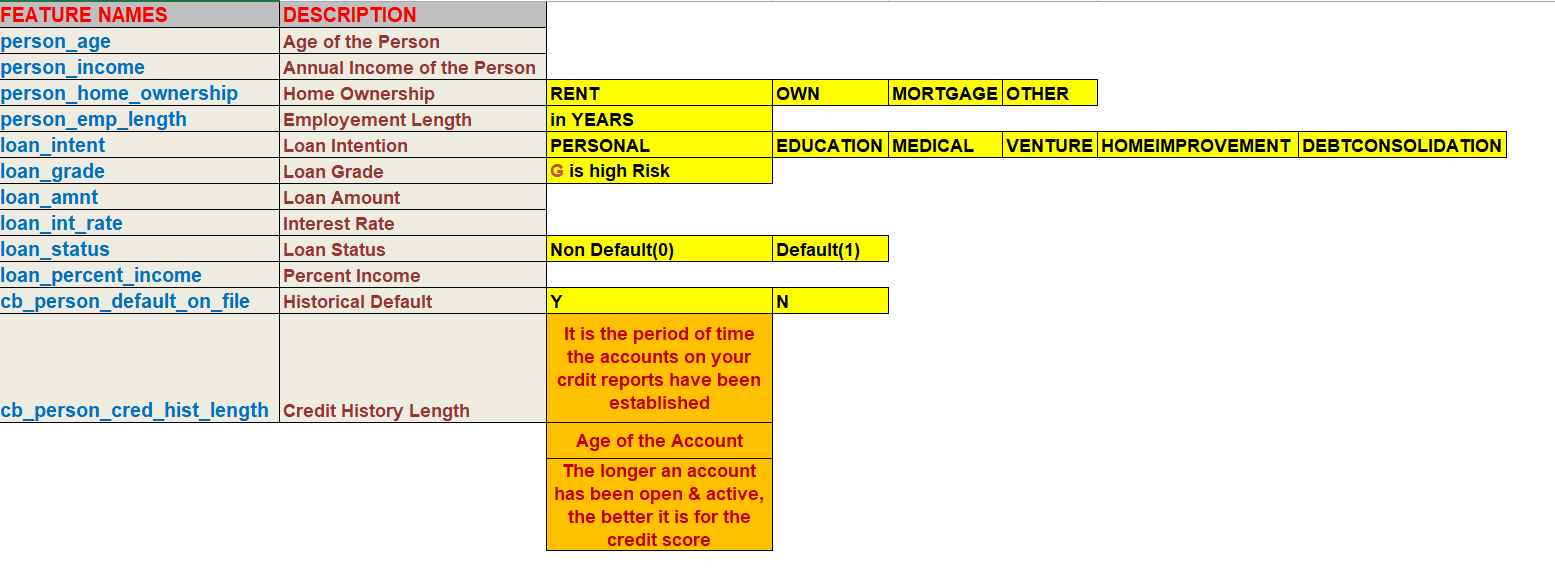

## <font color="BROWN">IMPORTING LIBRARIES: <font color/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## <font color="brown">DATA COLLECTION: <font color/>

In [3]:
df=pd.read_csv(r"D:\DV ANALYTIC\TOPICS\4. DATA MINING\ML PROJECT\1. BANKING\Bank Domain\credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## <font color="brown">DATA VALIDATION & DATA CLEANING: <font color/>

In [4]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
df.shape

(32581, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
round(df.isnull().sum()/df.shape[0]*100,2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

## <font color="dark blue">a. UNI-VARIATE ANALYSIS<font color/>

### <font color="orange">1. PERSON AGE<font color/>

In [9]:
df["person_age"].max()

144

In [10]:
df["person_age"].min()

20

<AxesSubplot:ylabel='person_age'>

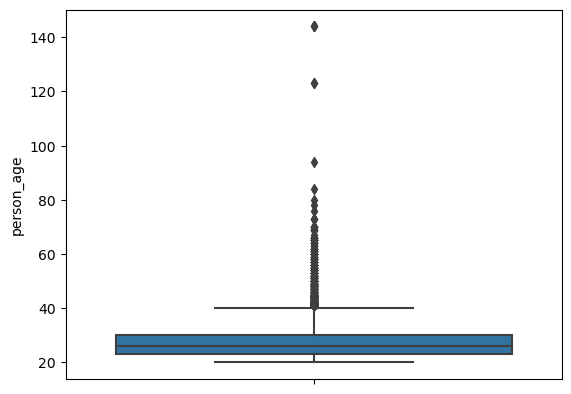

In [11]:
sns.boxplot(y="person_age",data=df)

In [12]:
df["person_age"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     20.0
0.1     22.0
0.2     23.0
0.3     24.0
0.4     25.0
0.5     26.0
0.6     27.0
0.7     29.0
0.8     32.0
0.9     36.0
1.0    144.0
Name: person_age, dtype: float64

In [13]:
df["person_age"].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91     36.0
0.92     37.0
0.93     38.0
0.94     39.0
0.95     40.0
0.96     41.0
0.97     43.0
0.98     45.4
0.99     50.0
1.00    144.0
Name: person_age, dtype: float64

In [14]:
df["person_age"].quantile([0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])

0.991     50.0
0.992     51.0
0.993     52.0
0.994     53.0
0.995     54.0
0.996     56.0
0.997     58.0
0.998     61.0
0.999     66.0
1.000    144.0
Name: person_age, dtype: float64

0.99 / 99% DATA ARE CLEANED IN THIS FEATURE.

In [15]:
med_age=df["person_age"].median()
med_age

26.0

In [16]:
df["person_age"][df["person_age"]>df["person_age"].quantile(0.999)]=med_age

<AxesSubplot:ylabel='person_age'>

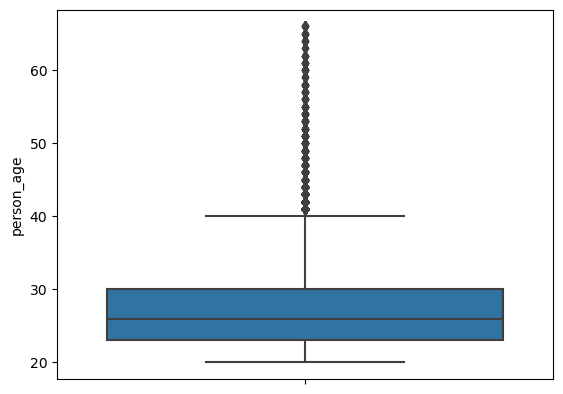

In [17]:
sns.boxplot(y="person_age",data=df)

IN THIS COLUMN, WE KNOW HIGHEST AGE OF THE PERSON WHO CAN TAKE LOAN IS 60.SO WE CAN TREAT OUTLERS IN THIS COLUMN BY PUTTING MEDIAN OF THE AGE.

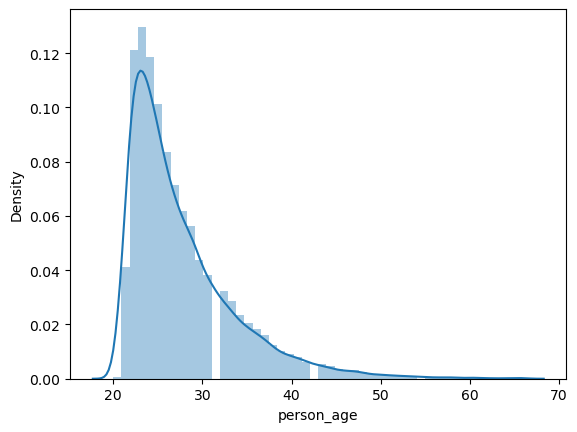

In [18]:
sns.distplot(df["person_age"])
plt.show()

### <font color="orange">2. PERSON INCOME<font color/>

In [19]:
df["person_income"].max()

6000000

In [20]:
df["person_income"].min()

4000

<AxesSubplot:ylabel='person_income'>

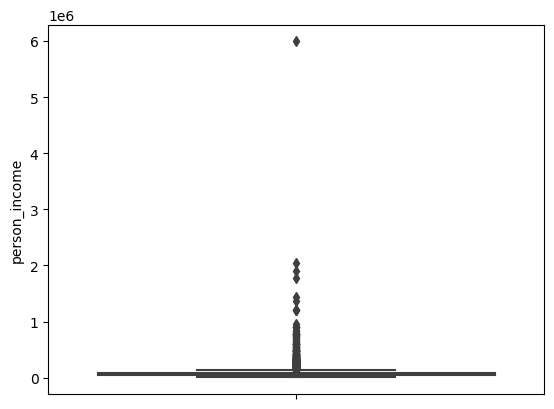

In [21]:
sns.boxplot(y="person_income",data=df)

In [22]:
df["person_income"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0       4000.0
0.1      28590.0
0.2      35000.0
0.3      42000.0
0.4      49000.0
0.5      55000.0
0.6      63000.0
0.7      73000.0
0.8      86000.0
0.9     110004.0
1.0    6000000.0
Name: person_income, dtype: float64

In [23]:
df["person_income"].quantile([0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9])

0.81     88550.4
0.82     90000.0
0.83     92000.0
0.84     95000.0
0.85     96300.0
0.86    100000.0
0.87    100000.0
0.88    104740.0
0.89    108000.0
0.90    110004.0
Name: person_income, dtype: float64

In [24]:
df["person_income"].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91     115275.0
0.92     120000.0
0.93     124755.6
0.94     130000.0
0.95     138000.0
0.96     148743.2
0.97     160000.0
0.98     182202.4
0.99     225200.0
1.00    6000000.0
Name: person_income, dtype: float64

In [25]:
df["person_income"].quantile([0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])

0.991     238000.0
0.992     250000.0
0.993     258000.0
0.994     275000.0
0.995     300000.0
0.996     306680.0
0.997     360000.0
0.998     450000.0
0.999     648000.0
1.000    6000000.0
Name: person_income, dtype: float64

In [26]:
med_inc=df["person_income"].median()
med_inc

55000.0

In [27]:
df["person_income"].quantile(0.99)

225200.00000000073

In [28]:
df["person_income"][df["person_income"]>df["person_income"].quantile(0.99)]

15        500000
33        306000
34        300000
42        300000
43        300000
          ...   
32497    1782000
32543     720000
32544     780000
32546    1900000
32551     780000
Name: person_income, Length: 326, dtype: int64

In [29]:
df["person_income"][df["person_income"]>df["person_income"].quantile(0.9)]=med_inc

<AxesSubplot:ylabel='person_income'>

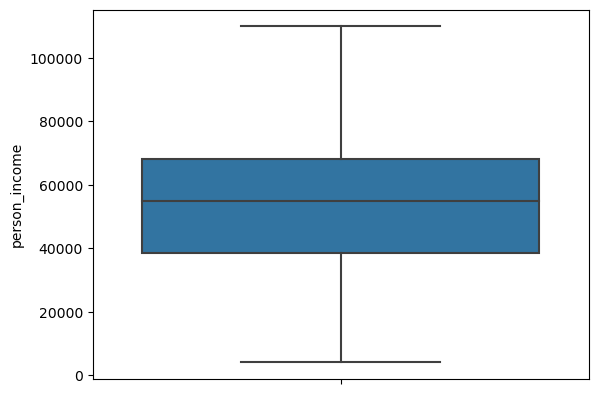

In [30]:
sns.boxplot(y="person_income",data=df)

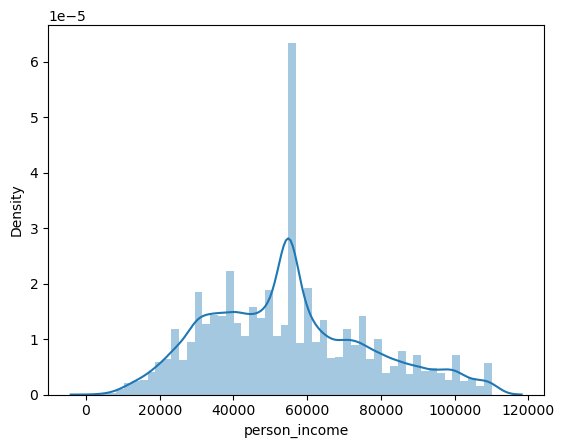

In [31]:
sns.distplot(df["person_income"])
plt.show()

### <font color="orange">3. PERSON HOME OWNERSHIP<font color/>

In [32]:
df["person_home_ownership"].value_counts(normalize=True)

RENT        0.504773
MORTGAGE    0.412633
OWN         0.079310
OTHER       0.003284
Name: person_home_ownership, dtype: float64

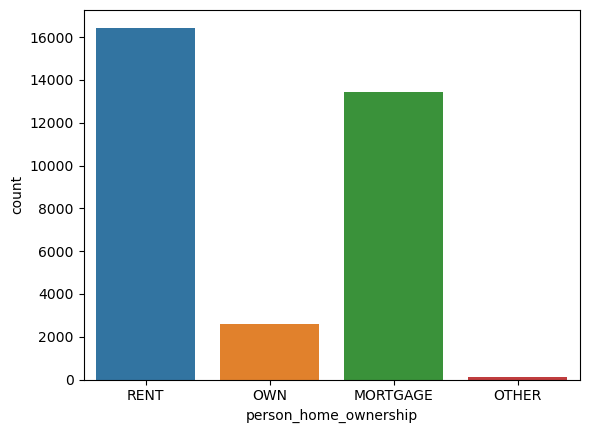

In [33]:
sns.countplot(x="person_home_ownership",data=df)
plt.show()

RENT HAVING MORE FREQUENCY.

### <font color="orange">4. PERSON EMPLOYEEMENT LENGTH<font color/>

In [34]:
df["person_emp_length"].max()

123.0

In [35]:
df["person_emp_length"].min()

0.0

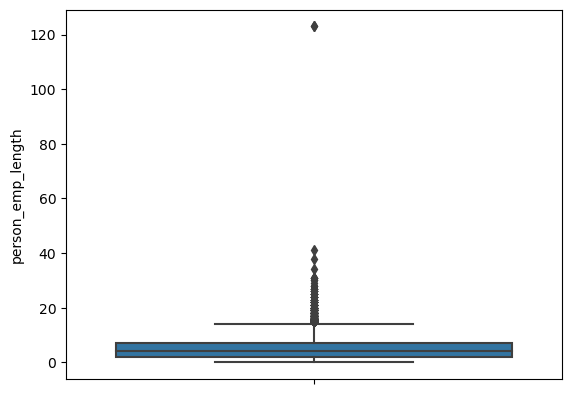

In [36]:
sns.boxplot(y="person_emp_length",data=df)
plt.show()

In [37]:
df["person_emp_length"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0      0.0
0.1      0.0
0.2      1.0
0.3      2.0
0.4      3.0
0.5      4.0
0.6      5.0
0.7      6.0
0.8      8.0
0.9     10.0
1.0    123.0
Name: person_emp_length, dtype: float64

In [38]:
df["person_emp_length"].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91     11.0
0.92     11.0
0.93     11.0
0.94     12.0
0.95     13.0
0.96     13.0
0.97     14.0
0.98     15.0
0.99     18.0
1.00    123.0
Name: person_emp_length, dtype: float64

In [39]:
df["person_emp_length"].quantile([0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])

0.991     18.0
0.992     18.0
0.993     18.0
0.994     19.0
0.995     19.0
0.996     20.0
0.997     21.0
0.998     22.0
0.999     25.0
1.000    123.0
Name: person_emp_length, dtype: float64

In [40]:
df["person_emp_length"][df["person_emp_length"]>35]

0        123.0
210      123.0
32355     41.0
32515     38.0
Name: person_emp_length, dtype: float64

In [41]:
med_emp=df["person_emp_length"].median()
med_emp

4.0

## <font color="green">NULL VALUE REPLACEMENT<font color/>

In [42]:
df["person_emp_length"].isnull().sum()

895

In [43]:
df["person_emp_length"][df["person_emp_length"].isnull()]=med_emp

In [44]:
df["person_emp_length"].isnull().sum()

0

In [45]:
df["person_emp_length"][df["person_emp_length"]>df["person_emp_length"].quantile(0.999)]=med_emp

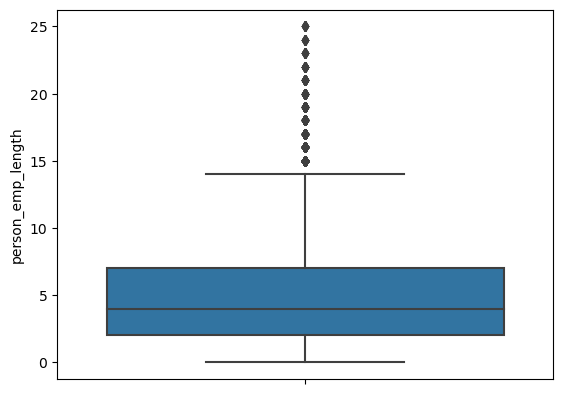

In [46]:
sns.boxplot(y="person_emp_length",data=df)
plt.show()

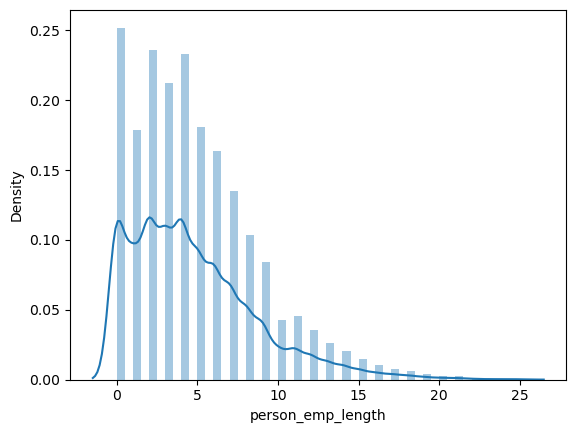

In [47]:
sns.distplot(df["person_emp_length"])
plt.show()

In [48]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### <font color="orange">5. LOAN INTENT<font color/>

In [49]:
df["loan_intent"].value_counts(normalize=True)

EDUCATION            0.198060
MEDICAL              0.186336
VENTURE              0.175532
PERSONAL             0.169455
DEBTCONSOLIDATION    0.159971
HOMEIMPROVEMENT      0.110647
Name: loan_intent, dtype: float64

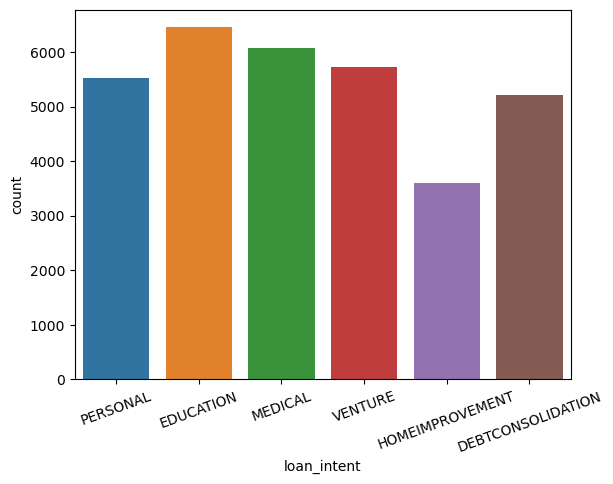

In [50]:
sns.countplot(x="loan_intent",data=df)
plt.xticks(rotation=20)
plt.show()

EDUCATION HAVE MORE FREQUNECY

### <font color="orange">6. LOAN GRADE<font color/>

In [51]:
df["loan_grade"].value_counts(normalize=True)

A    0.330776
B    0.320770
C    0.198214
D    0.111292
E    0.029588
F    0.007397
G    0.001964
Name: loan_grade, dtype: float64

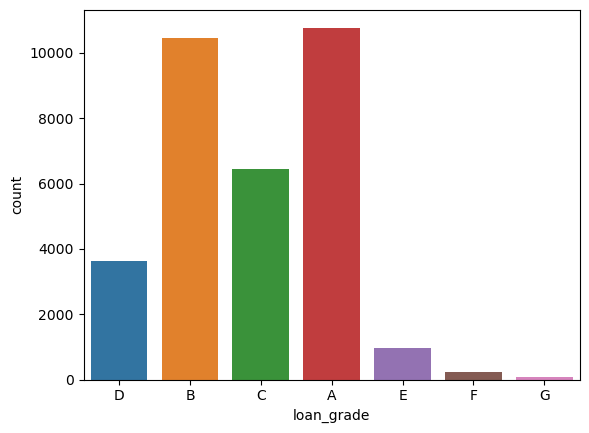

In [52]:
sns.countplot(x="loan_grade",data=df)
plt.show()

"A" LOAN GRADE HAVING MORE FREQUENCY

### <font color="orange">7. LOAN AMOUNT<font color/>

In [53]:
df["loan_amnt"].max()

35000

In [54]:
df["loan_amnt"].min()

500

In [55]:
df["loan_amnt"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0      500.0
0.1     3000.0
0.2     4400.0
0.3     5400.0
0.4     6750.0
0.5     8000.0
0.6    10000.0
0.7    12000.0
0.8    14500.0
0.9    19000.0
1.0    35000.0
Name: loan_amnt, dtype: float64

In [56]:
df["loan_amnt"].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91    20000.0
0.92    20000.0
0.93    20000.0
0.94    21000.0
0.95    24000.0
0.96    24250.0
0.97    25000.0
0.98    25000.0
0.99    29800.0
1.00    35000.0
Name: loan_amnt, dtype: float64

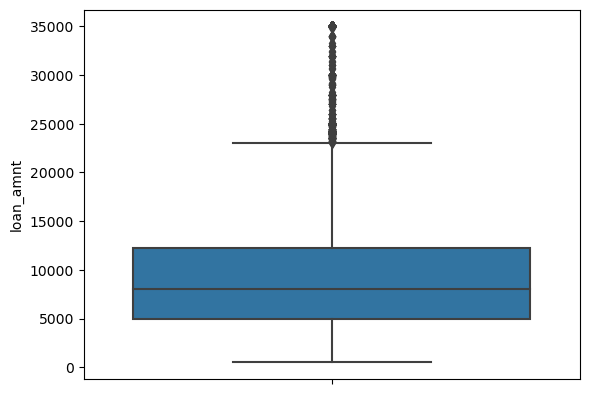

In [57]:
sns.boxplot(y="loan_amnt",data=df)
plt.show()

In [58]:
med_anm=df["loan_amnt"].median()
med_anm

8000.0

In [59]:
df["loan_amnt"][df["loan_amnt"]>df["loan_amnt"].quantile(0.9)]=med_anm

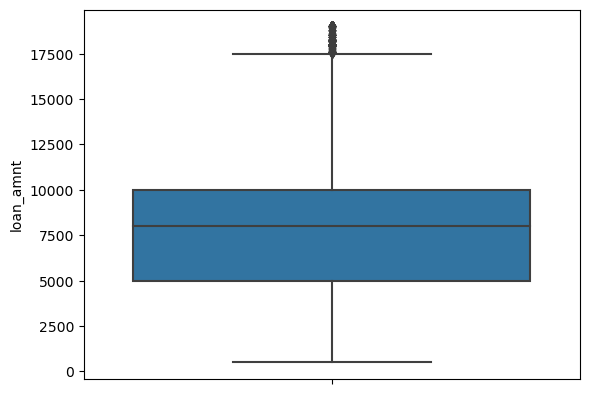

In [60]:
sns.boxplot(y="loan_amnt",data=df)
plt.show()

### <font color="orange">8. LOAN INTEREST RATE<font color/>

In [61]:
df["loan_int_rate"].max()

23.22

In [62]:
df["loan_int_rate"].min()

5.42

In [63]:
df["loan_int_rate"].isnull().sum()

3116

In [64]:
round(df["loan_int_rate"].isnull().sum()/df.shape[0]*100,2)

9.56

In [65]:
med_lir=df["loan_int_rate"].median()
med_lir

10.99

In [66]:
df["loan_int_rate"][df["loan_int_rate"].isnull()]=med_lir

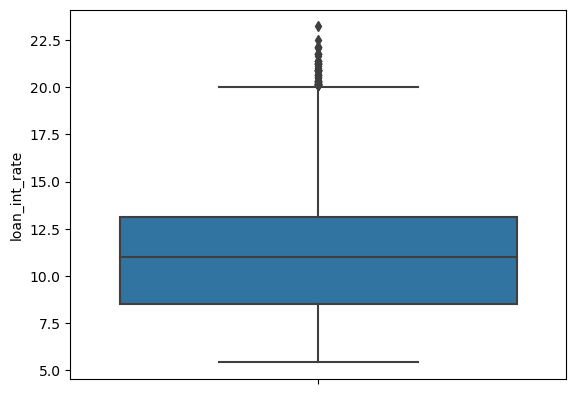

In [67]:
sns.boxplot(y="loan_int_rate",data=df)
plt.show()

### <font color="orange">9. LOAN STATUS<font color/>

In [68]:
df["loan_status"].value_counts(normalize=True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

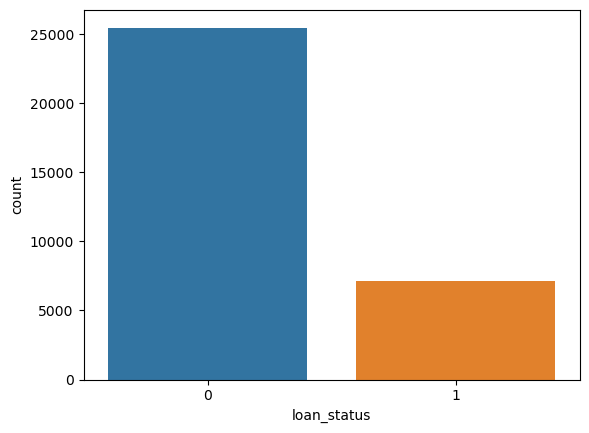

In [69]:
sns.countplot(x="loan_status",data=df)
plt.show()

LOAN STATUS IS THE TARGET FEATURE, & IT IS IMBALANCED IN NATURE.

### <font color="orange">10. LOAN PERCENT INCOME<font color/>

In [70]:
df["loan_percent_income"].max()

0.83

In [71]:
df["loan_percent_income"].min()

0.0

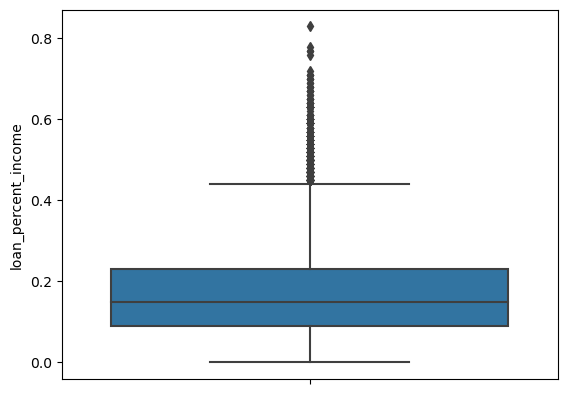

In [72]:
sns.boxplot(y="loan_percent_income",data=df)
plt.show()

In [73]:
df["loan_percent_income"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    0.00
0.1    0.05
0.2    0.08
0.3    0.10
0.4    0.12
0.5    0.15
0.6    0.18
0.7    0.21
0.8    0.25
0.9    0.32
1.0    0.83
Name: loan_percent_income, dtype: float64

In [74]:
df["loan_percent_income"].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91    0.33
0.92    0.34
0.93    0.35
0.94    0.36
0.95    0.38
0.96    0.40
0.97    0.42
0.98    0.44
0.99    0.50
1.00    0.83
Name: loan_percent_income, dtype: float64

In [75]:
med_lpin=df["loan_percent_income"].median()
med_lpin

0.15

In [76]:
df["loan_percent_income"][df["loan_percent_income"]>df["loan_percent_income"].quantile(0.99)]=med_lpin

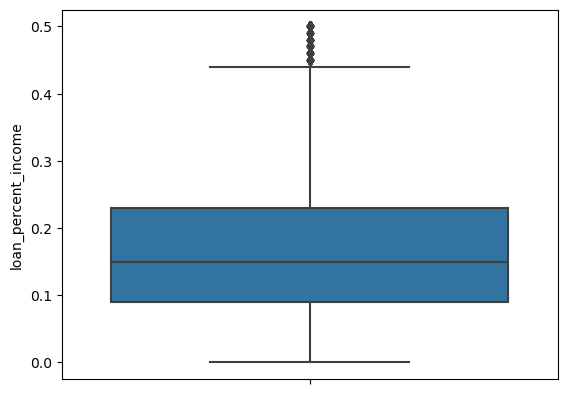

In [77]:
sns.boxplot(y="loan_percent_income",data=df)
plt.show()

### <font color="orange">11. CB PERSON DEFAULT ON FILE<font color/>

In [78]:
df["cb_person_default_on_file"].value_counts(normalize=True)

N    0.82367
Y    0.17633
Name: cb_person_default_on_file, dtype: float64

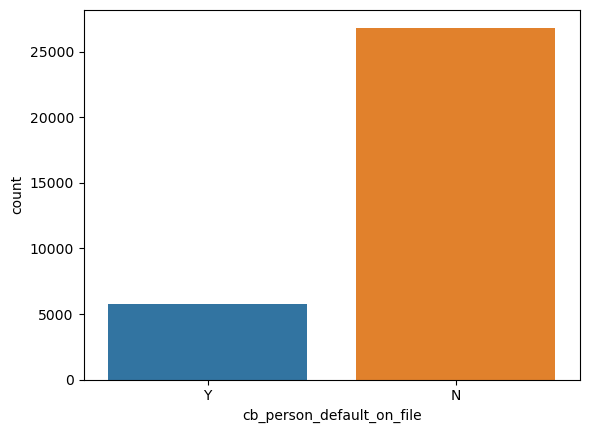

In [79]:
sns.countplot(x="cb_person_default_on_file",data=df)
plt.show()

SO MANY PERSONS HAVE NOT DEFAULT IN THE PAST

### <font color="orange">12. CB PERSON CRED HIST LENGTH<font color/>

In [80]:
df["cb_person_cred_hist_length"].max()

30

In [81]:
df["cb_person_cred_hist_length"].min()

2

In [82]:
df["cb_person_cred_hist_length"].value_counts(normalize=True)

2     0.183082
3     0.182407
4     0.181854
8     0.058378
7     0.058347
9     0.058163
5     0.057733
6     0.056996
10    0.056782
14    0.015101
12    0.014886
11    0.014211
16    0.013842
13    0.013597
15    0.013413
17    0.012492
20    0.000951
24    0.000921
28    0.000829
27    0.000675
22    0.000675
23    0.000675
30    0.000675
19    0.000645
21    0.000614
18    0.000583
25    0.000552
26    0.000491
29    0.000430
Name: cb_person_cred_hist_length, dtype: float64

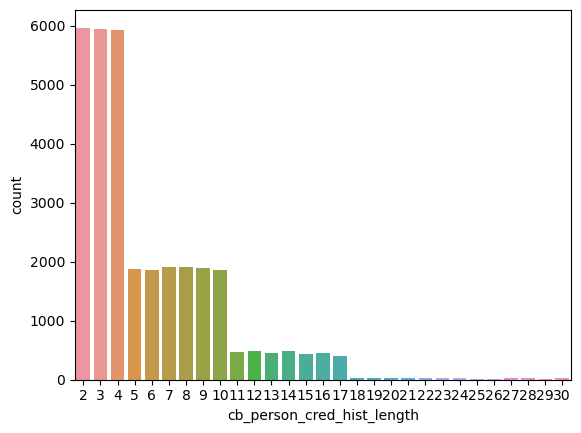

In [83]:
sns.countplot(x="cb_person_cred_hist_length",data=df)
plt.show()

In [84]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## <font color="dark blue">b. BI-VARIATE ANALYSIS<font color/>

### <font color="orange">1. person_age vs loan_status<font color/>

<AxesSubplot:xlabel='loan_status', ylabel='person_age'>

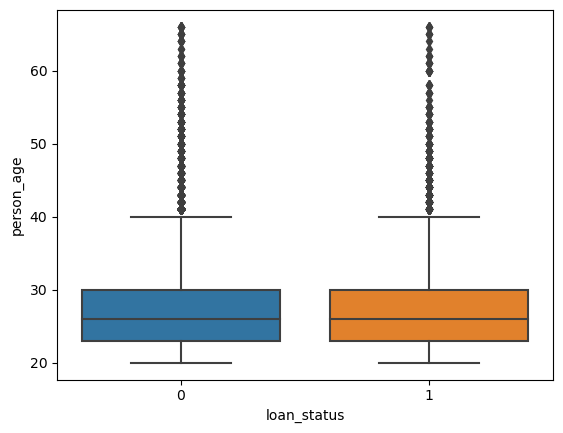

In [85]:
sns.boxplot(x="loan_status",y="person_age",data=df)

<AxesSubplot:xlabel='loan_status', ylabel='person_age'>

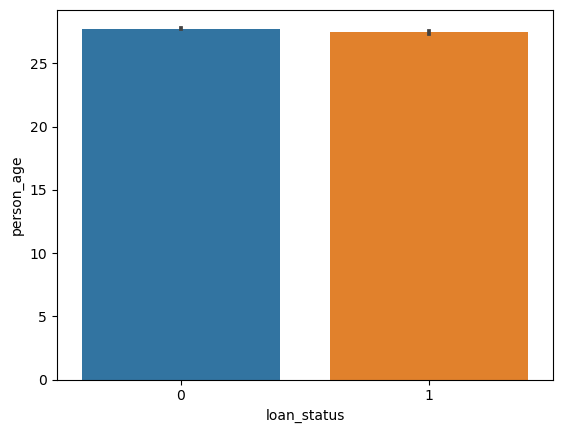

In [86]:
sns.barplot(x="loan_status",y="person_age",data=df)

### <font color="orange">2. person_income vs loan_status<font color/>

<AxesSubplot:xlabel='loan_status', ylabel='person_income'>

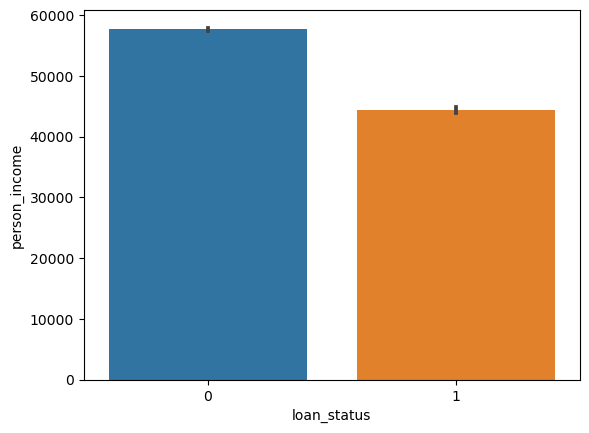

In [87]:
sns.barplot(x="loan_status",y="person_income",data=df)

<AxesSubplot:xlabel='loan_status', ylabel='person_income'>

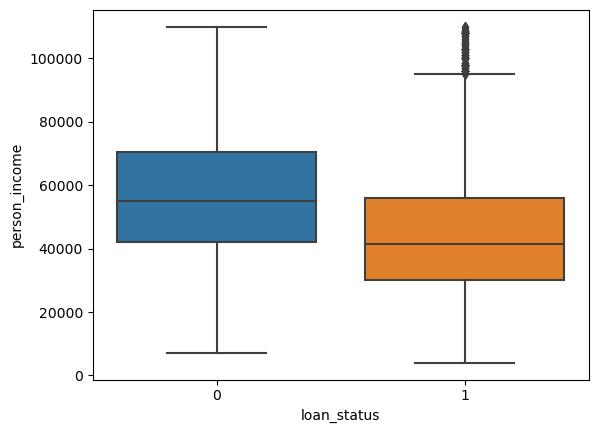

In [88]:
sns.boxplot(x="loan_status",y="person_income",data=df)

NON DEFUALT PERSON HAVE MORE INCOME THAN DEFAULTER.

### <font color="orange">3. person_home_ownership vs loan_status<font color/>

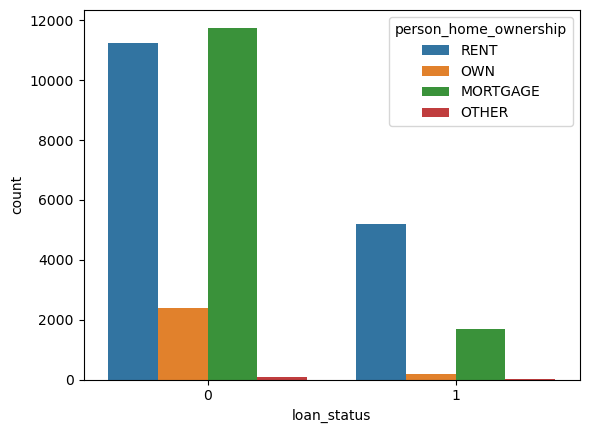

In [89]:
sns.countplot(x="loan_status",data=df,hue="person_home_ownership")
plt.show()

THOSE PERSON HAVE NON-DEFAULT ARE MORTGAGE HOME.

THOSE PERSON HAVE DEFAULT ARE STAY IN RENT HOME.

### <font color="orange">4. person_emp_length vs loan_status<font color/>

<AxesSubplot:xlabel='loan_status', ylabel='person_emp_length'>

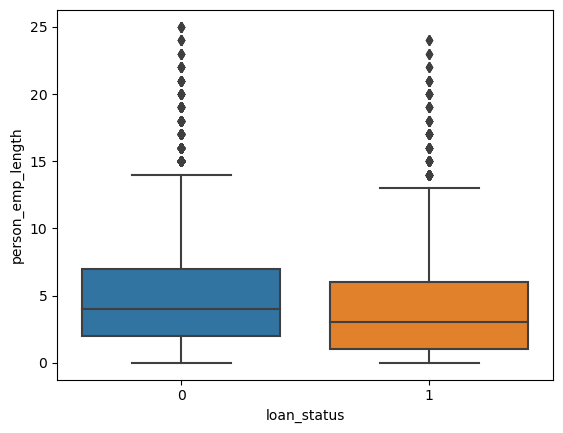

In [90]:
sns.boxplot(x="loan_status",y="person_emp_length",data=df)

THE NON-DEFAULT PERSON HAVING HIGH EMPLOYEEMNET LENGTH

### <font color="orange">5. loan_intent vs loan_status<font color/>

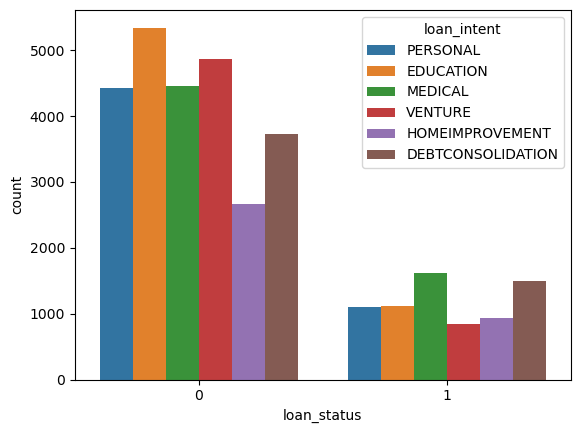

In [91]:
sns.countplot(x="loan_status",data=df,hue="loan_intent")
plt.show()

THOSE PERSON ARE NON-DEFAULT HAVING LOAN FOR EDUCATION PURPOSE.

THOSE PERSON ARE DEFAULT HAVING LOAN FOR MEDICAL PURPOSE.

### <font color="orange">6. loan_grade vs loan_status<font color/>

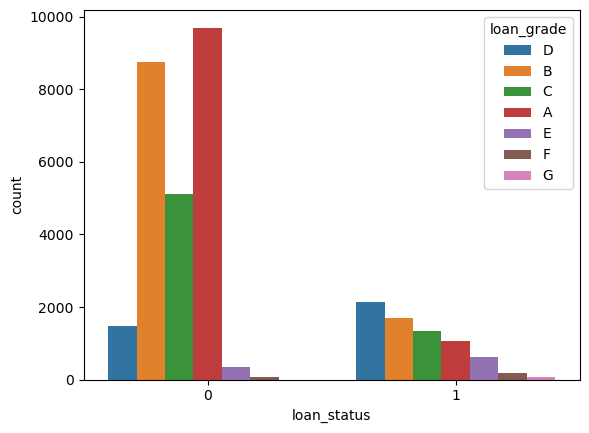

In [92]:
sns.countplot(x="loan_status",data=df,hue="loan_grade")
plt.show()

THOSE PERSON ARE NON-DEFAULT HAVING LOAN GRADE "A". "A" ARE NO RISK.

THOSE PERSON ARE DEFAULT HAVING LOAN GRADE "D"."D" ARE MEDIUM RISK.

### <font color="orange">7. loan_amnt vs loan_status<font color/>

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

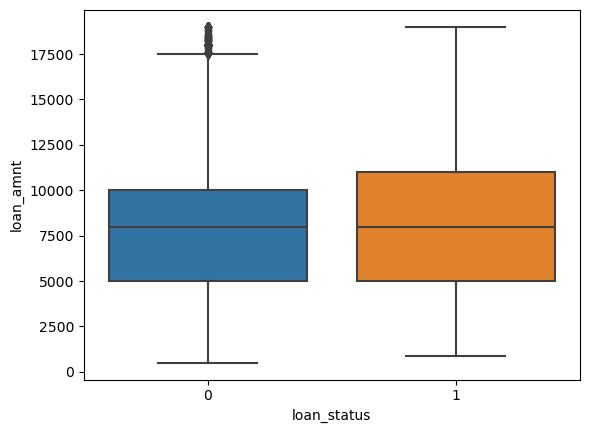

In [93]:
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

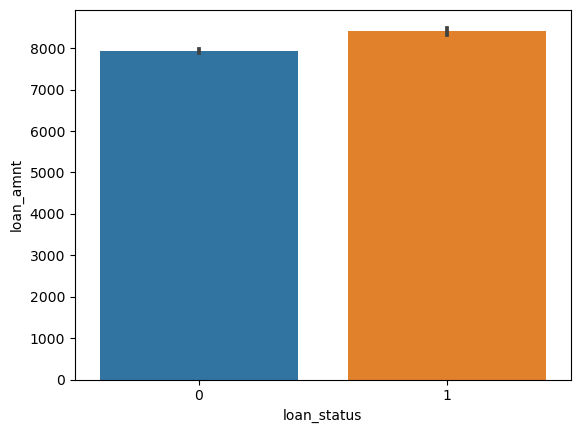

In [94]:
sns.barplot(x="loan_status",y="loan_amnt",data=df)

THOSE PERSON HAVING DEFAULT ARE TAKEN HIGH LOAN AMOUNT.

### <font color="orange">8. loan_int_rate vs loan_status<font color/>

<AxesSubplot:xlabel='loan_status', ylabel='loan_int_rate'>

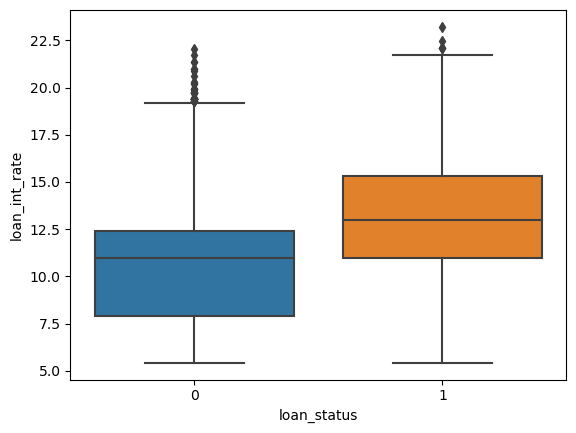

In [95]:
sns.boxplot(x="loan_status",y="loan_int_rate",data=df)

THOSE PERSON HAVING DEFAULT ARE HIGH LOAN INTEREST RATE.

### <font color="orange">9. loan_percent_income vs loan_status<font color/>

<AxesSubplot:xlabel='loan_status', ylabel='loan_percent_income'>

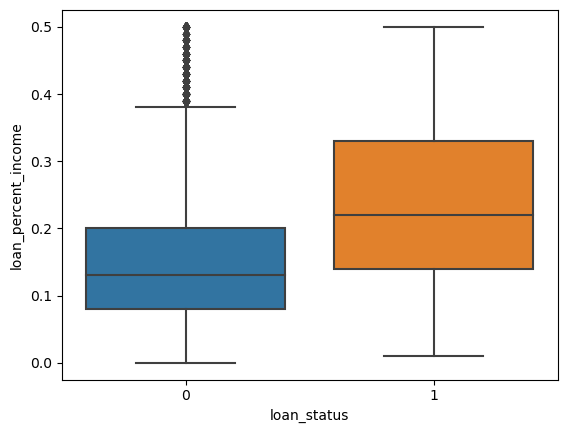

In [96]:
sns.boxplot(x="loan_status",y="loan_percent_income",data=df)

THOSE PERSON HAVING DEFAULT ARE HIGH LOAN PERCENT INCOME.

### <font color="orange">10. cb_person_default_on_file vs loan_status<font color/>

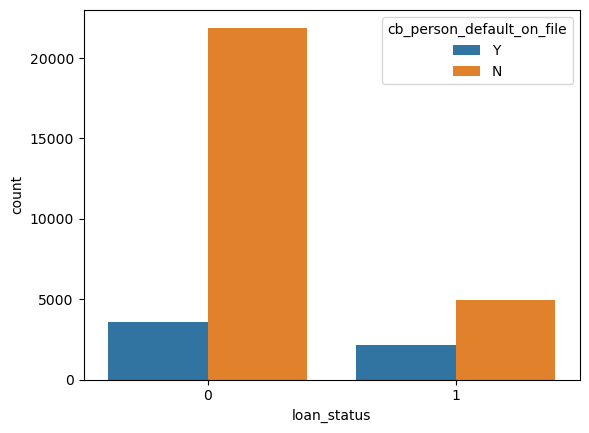

In [97]:
sns.countplot(x="loan_status",data=df,hue="cb_person_default_on_file")
plt.show()

THOSE PERSON HAVING NON DEFAULT ARE NO HISTORICAL DEFAULT.

THOSE PERSON HAVING DEFAULT ARE HIGH HISTORICAL DEFAULT.

### <font color="orange">11. cb_person_cred_hist_length vs loan_status<font color/>

<AxesSubplot:xlabel='loan_status', ylabel='cb_person_cred_hist_length'>

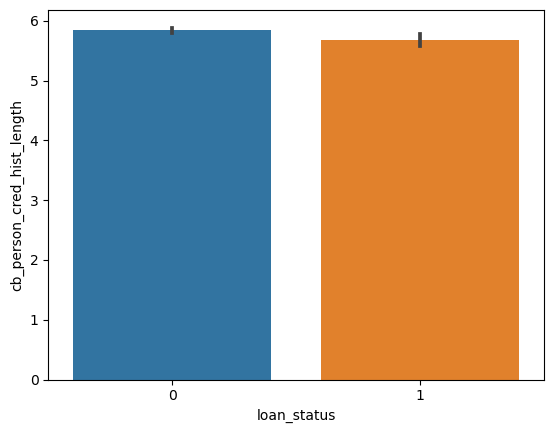

In [98]:
sns.barplot(x="loan_status",y="cb_person_cred_hist_length",data=df)

THOSE PERSON HAVING NON DEFAULT ARE HIGH CREDIT HISTORY LENGTH.

<AxesSubplot:>

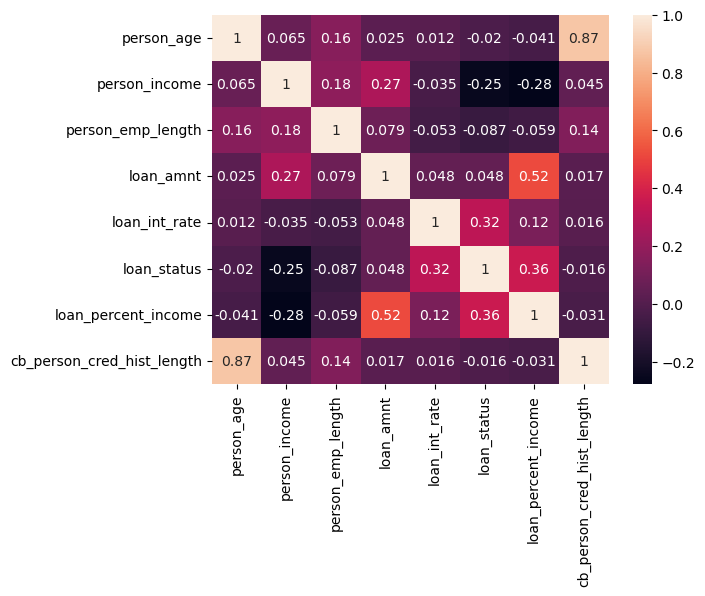

In [99]:
sns.heatmap(df.corr(),annot=True)

person_age IS HIGHLY CORRELATED WITH cb_person_cred_hist_length.

loan_amnt IS MODERATE CORRELATED WITH loan_percent_income.

### <font color="green">KEY INSIGHTS<font color/>
1. PERSON HAVING RENT HOUSE ARE MORE.
2. PERSON TAKE LOAN FOR EDUCATION.
3. LOAN GRADE-A PERSON ARE MORE.
4. LOAN STATUS IS THE TARGET FEATURE & THIS FEATURE IS IMBALANCED.
5. MANY PERSON ARE NON-DEFAULT IN PAST.
6. NON-DEFAULT PERSON HAVING INCOME MORE THAN DEFAULT.
7. PERSON HAVING NON-DEFAULT ARE MORTGAGE HOME.
8. PERSON HAVING DEFAULT ARE STAY IN RENT HOME.
9. PERSON HAVING NON-DEFAULT ARE HIGH EMPLOYEMENT LENGTH.
10. PERSON HAVING NON-DEFAULT ARE TAKEN LOAN FOR EDUCATION PURPOSE.
11. PERSON HAVING DEFAULT ARE TAKEN LOAN FOR MEDICAL PURPOSE.
12. PERSON HAVING DEFAULT ARE MORE LOAN AMOUNT.
13. PERSON HAVING DEFAULT ARE MORE LOAN INTEREST RATE.
14. PERSON HAVING NON-DEFAULT ARE NO HISTORICAL DEFAULT.
15. PERSON HAVING DEFAULT ARE HIGH HISTORICAL DEFAULT.
16. PERSON HAVING NON-DEFAULT ARE HIGH CREDIT HISTORY LENGTH.
17. person_age IS HIGHLY CORRELATED WITH cb_person_cred_hist_length.
18. loan_amnt IS MODERATE CORRELATED WITH loan_percent_income.

## <font color="brown">MODEL BUILDING<font color/>

In [100]:
df1=df.copy(deep=True)

In [101]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,4.0,PERSONAL,D,8000,16.02,1,0.15,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.15,N,3
3,23,65500,RENT,4.0,MEDICAL,C,8000,15.23,1,0.15,N,2
4,24,54400,RENT,8.0,MEDICAL,C,8000,14.27,1,0.15,Y,4


In [102]:
df1.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### <font color="orange">STEP-1:<font color/>
- IDENTIFY X & y.

In [103]:
X=df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate','loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]
y=df["loan_status"]

### <font color="orange">STEP-2:<font color/>
- SPLIT THE X & y INTO X_train,X_test,y_train,y_test.

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [105]:
X_train.shape, X_test.shape

((26064, 11), (6517, 11))

In [106]:
num_col=list(df.select_dtypes(include=["int64","float64"]).columns.drop("loan_status"))
num_col

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [107]:
obj_col=list(df.select_dtypes(include=["object"]).columns)
obj_col[0]

'person_home_ownership'

### <font color="orange">STEP-3:<font color/>
- DATA PREPARATION ON TRAIN & TEST DATA.

In [616]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [109]:
from sklearn.compose import ColumnTransformer

In [110]:
trans=ColumnTransformer(transformers=[
                        ("trf1",StandardScaler(),num_col),
                        ("trf2",OneHotEncoder(sparse=False,drop="first"),obj_col)],
                        remainder="passthrough")


In [111]:
X_train_trans=trans.fit_transform(X_train)
X_train_trans.shape

(26064, 22)

In [112]:
X_test_trans=trans.transform(X_test)
X_test_trans.shape

(6517, 22)

### <font color="orange">STEP-4:<font color/>
- MODEL BUILDING

In [113]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train_trans,y_train)

LogisticRegression()

In [114]:
y_tra_prd=log.predict(X_train_trans)

In [115]:
prd_act_tr=pd.DataFrame({"Actual":y_train,"Predict":y_tra_prd})
prd_act_tr

,Actual,Predict
27955,0,0
14653,1,0
14210,0,0
13343,0,0
24733,0,0
...,...,...
27640,0,0
14501,0,0
30727,0,0
14555,0,0


In [116]:
from sklearn import metrics
metrics.accuracy_score(y_train,y_tra_prd)

0.863950276243094

### <font color="orange">STEP-5:<font color/>
- PREDICTION ON TEST DATA

In [117]:
y_test_pred=log.predict(X_test_trans)

In [118]:
prd_act=pd.DataFrame({"Actual":y_test,"Predict":y_test_pred})
prd_act

,Actual,Predict
30043,1,1
29791,0,0
25999,0,0
28458,0,0
6897,0,0
...,...,...
28553,0,0
27224,0,0
25125,0,0
29434,0,0


### <font color="orange">STEP-6:<font color/>
- EVALUATION OF MODEL

In [119]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score
accuracy_score(y_test,y_test_pred)

0.8579100813257634

In [120]:
confusion_matrix(y_test,y_test_pred)

array([[4870,  237],
       [ 689,  721]], dtype=int64)

In [121]:
precision_score(y_test,y_test_pred)

0.7526096033402923

In [122]:
recall_score(y_test,y_test_pred)

0.5113475177304965

In [123]:
f1_score(y_test,y_test_pred)

0.6089527027027027

## <font color="dark blue">FEATURE ENGINEERING<font color/>

In [124]:
df1.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [125]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,4.0,PERSONAL,D,8000,16.02,1,0.15,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.15,N,3
3,23,65500,RENT,4.0,MEDICAL,C,8000,15.23,1,0.15,N,2
4,24,54400,RENT,8.0,MEDICAL,C,8000,14.27,1,0.15,Y,4


In [126]:
df2=df1.copy(deep=True)
df2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,4.0,PERSONAL,D,8000,16.02,1,0.15,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.15,N,3
3,23,65500,RENT,4.0,MEDICAL,C,8000,15.23,1,0.15,N,2
4,24,54400,RENT,8.0,MEDICAL,C,8000,14.27,1,0.15,Y,4


In [127]:
df2["person_home_ownership"].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [128]:
df2["person_home_ownership"].replace({"RENT":0,"MORTGAGE":1,"OWN":2,"OTHER":3},inplace=True)

In [129]:
df2["loan_intent"].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [130]:
df2["loan_intent"].replace({"EDUCATION":0,"MEDICAL":1,"VENTURE":2,"PERSONAL":3,"DEBTCONSOLIDATION":4,"HOMEIMPROVEMENT":5},inplace=True)

In [131]:
df2["loan_grade"].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [132]:
df2["loan_grade"].replace({"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6},inplace=True)

In [133]:
df2["cb_person_default_on_file"].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [134]:
df2["cb_person_default_on_file"].replace({"N":0,"Y":1},inplace=True)

In [135]:
df2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,4.0,3,3,8000,16.02,1,0.15,1,3
1,21,9600,2,5.0,0,1,1000,11.14,0,0.10,0,2
2,25,9600,1,1.0,1,2,5500,12.87,1,0.15,0,3
3,23,65500,0,4.0,1,2,8000,15.23,1,0.15,0,2
4,24,54400,0,8.0,1,2,8000,14.27,1,0.15,1,4


In [136]:
import statsmodels.api as sm
m1=sm.Logit(df2['loan_status'],df2[["person_age"]+['person_income']+['person_home_ownership']+['person_emp_length']+['loan_intent']+['loan_grade']+['loan_amnt']+["loan_int_rate"]+["loan_percent_income"]+["cb_person_default_on_file"]+["cb_person_cred_hist_length"]])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.363726
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363726
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32570
Method:                           MLE   Df Model:                           10
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.3066
Time:                        14:54:42   Log-Likelihood:                -11851.
converged:                       True   LL-Null:                       -17091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

IF THE "P" VALUE<0.05 THEN THE FEATURE IS IMPACTFUL,SO WE CAN KEEP THAT FEATURE.

IF THE "P" VALUE>0.05 THEN THE FEATURE IS NOT IMPACTFUL,SO WE CAN DROP THAT FEATURE.

SO, IN THIS DATASET, person_emp_length IS NOT IMPACTFUL.WE CAN DROP THIS FEATURE.

In [137]:
df2.drop(columns="person_emp_length",inplace=True)

In [138]:
import statsmodels.api as sm
m1=sm.Logit(df2['loan_status'],df2[["person_age"]+['person_income']+['person_home_ownership']+['loan_intent']+['loan_grade']+['loan_amnt']+["loan_int_rate"]+["loan_percent_income"]+["cb_person_default_on_file"]+["cb_person_cred_hist_length"]])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.363727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363727
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32571
Method:                           MLE   Df Model:                            9
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.3066
Time:                        14:54:43   Log-Likelihood:                -11851.
converged:                       True   LL-Null:                       -17091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

## <font color="dark blue">MULTICOLLINEARITY<font color/>

THE FEATURE HAVING VIF<5 THEN IT IS INDEPENDENT FEATURE, WE CAN KEEP THIS FEATURE.

THE FEATURE HAVING VIF>=5 THEN IT IS DEPENDENT FEATURE, WE CAN DROP THIS FEATURE.

In [139]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [140]:
vif_cal(input_data=df2, dependent_col="loan_status")

person_age  VIF =  4.17
person_income  VIF =  1.47
person_home_ownership  VIF =  1.03
loan_intent  VIF =  1.01
loan_grade  VIF =  5.24
loan_amnt  VIF =  1.83
loan_int_rate  VIF =  4.82
loan_percent_income  VIF =  1.87
cb_person_default_on_file  VIF =  1.41
cb_person_cred_hist_length  VIF =  4.14


HERE loan_grade FEATURE'S VIF>=5, IT IS DEPENDENT, WE CAN DROP THAT FEATURE.

In [141]:
df2.drop(columns="loan_grade",inplace=True)

In [142]:
vif_cal(input_data=df2, dependent_col="loan_status")

person_age  VIF =  4.17
person_income  VIF =  1.47
person_home_ownership  VIF =  1.03
loan_intent  VIF =  1.01
loan_amnt  VIF =  1.83
loan_int_rate  VIF =  1.32
loan_percent_income  VIF =  1.86
cb_person_default_on_file  VIF =  1.3
cb_person_cred_hist_length  VIF =  4.14


In [143]:
import statsmodels.api as sm
m1=sm.Logit(df2['loan_status'],df2[["person_age"]+['person_income']+['person_home_ownership']+['loan_intent']+['loan_amnt']+["loan_int_rate"]+["loan_percent_income"]+["cb_person_default_on_file"]+["cb_person_cred_hist_length"]])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.393664
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.393664
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32572
Method:                           MLE   Df Model:                            8
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.2496
Time:                        14:54:44   Log-Likelihood:                -12826.
converged:                       True   LL-Null:                       -17091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

In [144]:
Res=m1.fit()

Optimization terminated successfully.
         Current function value: 0.393664
         Iterations 7


## <font color="dark blue">CHI SQAURE<font color/>

IT IS USED TO GIVE BEST FEATURES FROM THE DATASET.

WHICH FEATURE HAVING HIGH VALUE ARE CONSIDER AS BEST FEATURE.

In [145]:
fea=round(Res.tvalues.pow(2)).sort_values(ascending=False)
fea

person_age                    1509.0
loan_percent_income           1449.0
loan_int_rate                 1113.0
person_home_ownership         1080.0
person_income                  742.0
cb_person_cred_hist_length     573.0
loan_intent                    152.0
cb_person_default_on_file      114.0
loan_amnt                      111.0
dtype: float64

In [146]:
fea.head(5)

person_age               1509.0
loan_percent_income      1449.0
loan_int_rate            1113.0
person_home_ownership    1080.0
person_income             742.0
dtype: float64

In [147]:
top_5_fea=pd.DataFrame(fea.head(5),columns=["chi_sqaure_val"])
top_5_fea

,chi_sqaure_val
person_age,1509.0
loan_percent_income,1449.0
loan_int_rate,1113.0
person_home_ownership,1080.0
person_income,742.0


In [148]:
import statsmodels.api as sm
m1=sm.Logit(df2['loan_status'],df2[["person_age"]+['loan_percent_income']+['loan_int_rate']+['person_home_ownership']+['person_income']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.408358
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.408358
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32576
Method:                           MLE   Df Model:                            4
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.2215
Time:                        14:54:45   Log-Likelihood:                -13305.
converged:                       True   LL-Null:                       -17091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [149]:
df3=df2[["person_age","loan_percent_income","loan_int_rate","person_home_ownership","person_income","loan_status"]].copy(deep=True)
df3.head()

,person_age,loan_percent_income,loan_int_rate,person_home_ownership,person_income,loan_status
0,22,0.15,16.02,0,59000,1
1,21,0.10,11.14,2,9600,0
2,25,0.15,12.87,1,9600,1
3,23,0.15,15.23,0,65500,1
4,24,0.15,14.27,0,54400,1


In [150]:
X1=df3.drop(columns="loan_status")
y1=df3["loan_status"]

In [151]:
from sklearn.pipeline import Pipeline

In [152]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.20,random_state=40)

In [153]:
trf1=ColumnTransformer([
    ("scl",StandardScaler(),[0,1,2,4])
],remainder="passthrough")

In [154]:
trf2=LogisticRegression()

In [155]:
pipe=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2)
])

In [156]:
from sklearn import set_config
set_config(display='diagram')

In [157]:
pipe.fit(X_train1,y_train1)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scl', StandardScaler(),
                                                  [0, 1, 2, 4])])),
                ('trf2', LogisticRegression())])

In [158]:
y_tr_prd1=pipe.predict(X_train1)

In [159]:
y_tr_prd1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
metrics.accuracy_score(y_train1,y_tr_prd1)

0.8415438919582566

In [161]:
y_te_prd1=pipe.predict(X_test1)

In [162]:
y_te_prd1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [163]:
metrics.accuracy_score(y_test,y_te_prd1)

0.8388829215896885

In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1,y_te_prd1,normalize="true")

array([[0.95085177, 0.04914823],
       [0.56666667, 0.43333333]])

In [165]:
confusion_matrix(y_test1,y_te_prd1)

array([[4856,  251],
       [ 799,  611]], dtype=int64)

In [166]:
confusion_matrix(y_train1,y_tr_prd1,normalize="true")

array([[0.95030934, 0.04969066],
       [0.54720955, 0.45279045]])

In [206]:
precision_score(y_test1,y_te_prd1)

0.7088167053364269

In [207]:
recall_score(y_test1,y_te_prd1)

0.43333333333333335

In [208]:
f1_score(y_test1,y_te_prd1)

0.5378521126760564

IT IS A GOOD MODEL, BUT IT IS IMBALANCED DATA.

### <font color="green">NOTE<font color/>
- HERE THE CASE LIKE ==> IF THE ACTUAL LABEL IS DEFAULT BUT IT PREDICTED AS NON-DEFAULT. HERE FALSE POSITIVE IS IMPORTANT SO WE HAVE TO INCREASE THE PRECISION VALUE.

In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_te_prd1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5107
           1       0.71      0.43      0.54      1410

    accuracy                           0.84      6517
   macro avg       0.78      0.69      0.72      6517
weighted avg       0.83      0.84      0.82      6517



In [168]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [169]:
print("Precision - ",precision_score(y_test1,y_te_prd1))
print("Recall - ",recall_score(y_test1,y_te_prd1))

Precision -  0.7088167053364269
Recall -  0.43333333333333335


In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [171]:
X_new = df3.drop(columns=["loan_status"])  
y_new = df['loan_status']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the random forest model
rf_model.fit(X_train_new, y_train_new)

# Predict probabilities for the test set
y_prob_new = rf_model.predict_proba(X_test_new)[:, 1]

# Calculate ROC AUC score
auc_new = roc_auc_score(y_test_new, y_prob_new)

importances_new = rf_model.feature_importances_  # Getting feature importances from the Random Forest model

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_new.columns,
    'Importance': importances_new })

# Sorting by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [172]:
feature_importance_df

,Feature,Importance
1,loan_percent_income,0.292246
2,loan_int_rate,0.258296
4,person_income,0.244925
3,person_home_ownership,0.103518
0,person_age,0.101014


IT'S PROVED THAT THESE FIVE FEATURES ARE MORE IMPORTANT

In [173]:
# df3.to_csv(r"D:\DV ANALYTIC\TOPICS\4. DATA MINING\ML PROJECT\1. BANKING\Bank Domain\final_data.csv",index=False)

## <font color="dark blue">IMBALANCED DATASET<font color/>

NOW WE HAVE BALANCED THE DATASET USING __`UNDERSAMPLING TECHNIQUE`__ WITH __`RATO=1:2`__.

In [174]:
from sklearn.utils import resample

In [175]:
data_majority = df3[df3["loan_status"] == 0]
data_minority = df3[df3["loan_status"] == 1]

In [176]:
ratio =2
# Calculate the new size for the majority class
majority_size_ratio = len(data_minority) * ratio

# Undersample the majority class
data_majority_undersampled = resample(data_majority, 
                                             replace=False,    # Sample without replacement
                                             n_samples=majority_size_ratio, 
                                             random_state=42)  

# Combine the undersampled majority class with the minority class
data_balanced_undersampled = pd.concat([data_majority_undersampled, data_minority])

# Shuffle the dataset to mix majority and minority examples
data_balanced_undersampled = data_balanced_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Checking the new class distribution
print(data_balanced_undersampled['loan_status'].value_counts())

0    14216
1     7108
Name: loan_status, dtype: int64


In [177]:
data_balanced_1_1=data_balanced_undersampled.copy()

In [178]:
X = data_balanced_1_1.drop(columns=["loan_status"])
y = data_balanced_1_1["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = LogisticRegression(random_state=40)
rf_classifier.fit(X_train, y_train)

y_probs = rf_classifier.predict_proba(X_test)[:, 1]

In [179]:
y_probs

array([0.05099257, 0.29644033, 0.48728568, ..., 0.36028938, 0.43919977,
       0.1953611 ])

In [180]:
y_pred_threshold = (y_probs >= 0.9).astype(int)

In [181]:
y_pred_threshold

array([0, 0, 0, ..., 0, 0, 0])

In [182]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, auc,accuracy_score

In [183]:
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
    
# Calculate Precision-Recall AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall_vals, precision_vals)

In [184]:
accuracy_score(y_test, y_pred_threshold)

0.6682297772567409

In [185]:
confusion_matrix(y_test, y_pred_threshold)

array([[2840,    0],
       [1415,   10]], dtype=int64)

In [186]:
precision

1.0

In [187]:
pr_auc

0.6327644659665081

In [188]:
recall

0.007017543859649123

In [189]:
f1

0.013937282229965157

IT GAVE LESS ACCURACY..WE WANT GOOD ACCURACY WITH GOOD PRECISION VALUE.

In [190]:
pipe1=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2)
])

In [191]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scl', StandardScaler(),
                                                  [0, 1, 2, 4])])),
                ('trf2', LogisticRegression())])

In [192]:
y_tr_prd=pipe.predict(X_train)

In [193]:
metrics.accuracy_score(y_train,y_tr_prd)

0.7876194384196026

In [194]:
y_te_prd=pipe.predict(X_test)

In [195]:
metrics.accuracy_score(y_test,y_te_prd)

0.7955451348182884

In [196]:
confusion_matrix(y_test,y_te_prd)

array([[2515,  325],
       [ 547,  878]], dtype=int64)

In [197]:
confusion_matrix(y_test,y_te_prd,normalize="true")

array([[0.88556338, 0.11443662],
       [0.38385965, 0.61614035]])

In [198]:
precision = precision_score(y_test, y_te_prd)
precision

0.7298420615128844

In [199]:
recall = recall_score(y_test, y_te_prd)
recall

0.616140350877193

In [200]:
f1 = f1_score(y_test, y_te_prd)
f1   


0.6681887366818874

In [201]:
# Calculate Precision-Recall AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_te_prd)
pr_auc = auc(recall_vals, precision_vals)

In [202]:
pr_auc

0.7371178181528347

IT GIVE GOOD ACCURACY AS WELL AS PRECISION VALUE

## <font color="dark blue">HYPERPARAMETER TUNING<font color/>

In [232]:
param=[
    {"trf2__penalty":["l1","l2"],
     "trf2__C":[0.001, 0.01, 0.1, 1, 10],
     "trf2__max_iter":[100, 200, 300],
     "trf2__solver":["saga","liblinear"]
    }
]

In [233]:
from sklearn.metrics import make_scorer
# Create a dictionary of scoring functions
scorings = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)}

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
grid=GridSearchCV(pipe1,param,cv=5,scoring=scorings,refit="accuracy",verbose=1)

In [236]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scl',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          2,
                                                                          4])])),
                                       ('trf2', LogisticRegression())]),
             param_grid=[{'trf2__C': [0.001, 0.01, 0.1, 1, 10],
                          'trf2__max_iter': [100, 200, 300],
                          'trf2__penalty': ['l1', 'l2'],
                          'trf2__solver': ['saga', 'liblinear']}],
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=1)

In [237]:
bes_param=grid.best_params_
bes_param

{'trf2__C': 0.001,
 'trf2__max_iter': 100,
 'trf2__penalty': 'l2',
 'trf2__solver': 'liblinear'}

In [238]:
bes_scor=grid.best_score_
bes_scor

0.7877369368737719

In [ ]:
SMOTE TECHNIQUE

In [251]:
from imblearn.over_sampling import SMOTE

In [253]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

In [255]:
import collections
print("Before SMOTE", collections.Counter(y_train))
print("After SMOTE", collections.Counter(y_resampled_smote))

Before SMOTE Counter({0: 11376, 1: 5683})
After SMOTE Counter({1: 11376, 0: 11376})


In [258]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy=0.8, random_state = 2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

import collections
print("Before SMOTE", collections.Counter(y_train))
print("After SMOTE", collections.Counter(y_train_smote))

Before SMOTE Counter({0: 11376, 1: 5683})
After SMOTE Counter({0: 11376, 1: 9100})


In [259]:
pipe1.fit(X_resampled_smote, y_resampled_smote)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scl', StandardScaler(),
                                                  [0, 1, 2, 4])])),
                ('trf2', LogisticRegression())])

In [262]:
y_tr_res_prd=pipe.predict(X_train1)

In [263]:
metrics.accuracy_score(y_train1,y_tr_res_prd)

0.7600905463474524

In [264]:
y_te_res_prd=pipe.predict(X_test1)

In [265]:
metrics.accuracy_score(y_test1,y_te_res_prd)

0.7610863894429952

In [266]:
confusion_matrix(y_test1,y_te_res_prd)

array([[3933, 1174],
       [ 383, 1027]], dtype=int64)

In [267]:
precision_score(y_test1,y_te_res_prd)

0.46660608814175375

In [268]:
recall_score(y_test1,y_te_res_prd)

0.7283687943262411

### SMOTE RESAMPLING TECHNIQUE

In [269]:
pipe1.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scl', StandardScaler(),
                                                  [0, 1, 2, 4])])),
                ('trf2', LogisticRegression())])

In [270]:
y_tr_res_prd=pipe.predict(X_train1)

In [271]:
metrics.accuracy_score(y_train1,y_tr_res_prd)

0.7843385512584408

In [272]:
y_te_res_prd=pipe.predict(X_test1)

In [273]:
metrics.accuracy_score(y_test1,y_te_res_prd)

0.7871720116618076

In [274]:
confusion_matrix(y_test1,y_te_res_prd)

array([[4152,  955],
       [ 432,  978]], dtype=int64)

In [275]:
precision_score(y_test1,y_te_res_prd)

0.5059493016037248

In [276]:
recall_score(y_test1,y_te_res_prd)

0.6936170212765957

In [277]:
grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scl',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          2,
                                                                          4])])),
                                       ('trf2', LogisticRegression())]),
             param_grid=[{'trf2__C': [0.001, 0.01, 0.1, 1, 10],
                          'trf2__max_iter': [100, 200, 300],
                          'trf2__penalty': ['l1', 'l2'],
                          'trf2__solver': ['saga', 'liblinear']}],
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=1)

In [278]:
bes_param=grid.best_params_
bes_param

{'trf2__C': 0.01,
 'trf2__max_iter': 100,
 'trf2__penalty': 'l1',
 'trf2__solver': 'liblinear'}

In [279]:
bes_scor=grid.best_score_
bes_scor

0.7748591913728632

### 

In [283]:
df3.columns

Index(['person_age', 'loan_percent_income', 'loan_int_rate',
       'person_home_ownership', 'person_income', 'loan_status'],
      dtype='object')

In [326]:
df4=df1[["person_age","loan_percent_income","loan_int_rate","person_home_ownership","person_income","loan_status"]].copy(deep=True)
df4.head()

,person_age,loan_percent_income,loan_int_rate,person_home_ownership,person_income,loan_status
0,22,0.15,16.02,RENT,59000,1
1,21,0.10,11.14,OWN,9600,0
2,25,0.15,12.87,MORTGAGE,9600,1
3,23,0.15,15.23,RENT,65500,1
4,24,0.15,14.27,RENT,54400,1


In [327]:
X1=df4.drop(columns=["loan_status"])
y1=df4["loan_status"]

In [328]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X1,y1,test_size=0.20,random_state=40)

In [622]:
# trf11=ColumnTransformer(transformers=[
#     ("scl",StandardScaler(),[0,1,2,4]),
#     ("ohe",OneHotEncoder(drop="first",handle_unknown="error",sparse=False),[3])
# ],remainder="passthrough")

In [630]:
trf11=ColumnTransformer(transformers=[
    ("scl",StandardScaler(),[0,1,2,4]),
])

In [631]:
trf2

LogisticRegression()

In [632]:
pipe2=Pipeline([
    ("trf11",trf11),
    ("trf2",trf2)
])

In [633]:
pipe2.fit(X_train3,y_train3)

Pipeline(steps=[('trf11',
                 ColumnTransformer(transformers=[('scl', StandardScaler(),
                                                  [0, 1, 2, 4])])),
                ('trf2', LogisticRegression())])

In [634]:
y_prd_tr1=pipe2.predict(X_train3)

In [635]:
y_prd_tr1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [636]:
accuracy_score(y_train3,y_prd_tr1)

0.8248158379373849

In [637]:
y_prd_te1=pipe2.predict(X_test3)

In [638]:
accuracy_score(y_test3,y_prd_te1)

0.8230781034218199

In [639]:
confusion_matrix(y_test3,y_prd_te1)

array([[4828,  279],
       [ 874,  536]], dtype=int64)

In [640]:
precision_score(y_test3,y_prd_te1)

0.6576687116564417

In [641]:
recall_score(y_test3,y_prd_te1)

0.3801418439716312

In [642]:
y_prob=pipe2.predict_proba(X_test3)[:, 1]

In [643]:
y_pred_threshold2 = np.where(y_prob>=0.7,1,0)

In [644]:
y_pred_threshold2.shape

(6517,)

In [645]:
y_test3.shape

(6517,)

In [646]:
y_prob.shape

(6517,)

In [647]:
y_prob

array([0.32866922, 0.10240017, 0.02265219, ..., 0.01576041, 0.11754266,
       0.01782064])

In [607]:
accuracy_score(y_test3, y_pred_threshold2)

0.8210833205462637

In [608]:
precision_score(y_test3, y_pred_threshold2)

0.8485714285714285

In [609]:
recall_score(y_test3, y_pred_threshold2)

0.21063829787234042

In [610]:
confusion_matrix(y_test3, y_pred_threshold2)

array([[5054,   53],
       [1113,  297]], dtype=int64)

In [611]:
import pickle

In [654]:
pickle.dump(pipe2,open(r"D:\DV ANALYTIC\TOPICS\4. DATA MINING\ML PROJECT\1. BANKING\Bank Domain\MODEL\pipe2.pkl","wb"))

In [613]:
md=pickle.load(open(r"D:\DV ANALYTIC\TOPICS\4. DATA MINING\ML PROJECT\1. BANKING\Bank Domain\MODEL\pipe2.pkl","rb"))

In [614]:
pickle.dump(df4,open(r"D:\DV ANALYTIC\TOPICS\4. DATA MINING\ML PROJECT\1. BANKING\Bank Domain\MODEL\df.pkl","wb"))

In [615]:
pickle.dump(pipe2,open(r"D:\DV ANALYTIC\TOPICS\4. DATA MINING\ML PROJECT\1. BANKING\Bank Domain\MODEL\pipe.pkl","wb"))

In [648]:
vec=[[28,0.45,74.27,"RENT",94400]]

In [649]:
er=md.predict_proba(vec)[:,1]
er

array([0.99999999])

In [650]:
np.where(er>=0.7,1,0)

array([1])

In [651]:
md.predict(vec)

array([1], dtype=int64)

In [652]:
e=md.predict_proba(vec)[:,1]
e

array([0.99999999])

In [653]:
np.where(e>=0.7,1,0)[0]

1

In [499]:
list(df4["person_home_ownership"].unique())

['RENT', 'OWN', 'MORTGAGE', 'OTHER']

In [503]:
a=np.array([[28,0.45,74.27,"RENT",94400]])

In [505]:
type(md.predict(a))

numpy.ndarray

In [508]:
type(md.predict(a)[0])

numpy.int64

In [509]:
md.predict(a)[0]

1

In [519]:
# df4.to_csv(r"D:\DV ANALYTIC\TOPICS\4. DATA MINING\ML PROJECT\1. BANKING\Bank Domain\final_data.csv",index=False)